In [1311]:
import numpy as np
import pinocchio
from problem_setup import create_base_graph, contract_graph, goal_graph, constraints_graph, joint_variables
from problem_solver import simple_IK
from utils import *
import matplotlib.pyplot as plt

import tqdm

%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1312]:
axis_length = 0.3
urdf_filename= "GraphIK/graphik/robots/urdfs/lwa4d.urdf" #"GraphIK/graphik/robots/urdfs/kuka_iiwr.urdf"

#"GraphIK/graphik/robots/urdfs/kuka_iiwr.urdf"
#"GraphIK/graphik/robots/urdfs/ur10_mod.urdf"
#"GraphIK/graphik/robots/urdfs/kuka_lwr.urdf"
# 'GraphIK/graphik/robots/urdfs/panda_arm.urdf'

base_anchor=True
anchor = True

model    = pinocchio.buildModelFromUrdf(urdf_filename)
data     = model.createData()

model_axis = compute_rotation_axis_from_model(model,data)

G, pos_ref, original_nodes = create_base_graph(model,data,axis_length,base_anchor=base_anchor,model_axis=model_axis)
G, dict_alias = contract_graph(G)

q0 = pinocchio.randomConfiguration(model)
#q0  = np.array([3,2,-4.3,0,2,-1,0])*np.pi/180
pinocchio.framesForwardKinematics(model,data,q0)

position = data.oMi[-1].translation.copy()
direction = (data.oMi[-1].rotation@np.array([0,0,1])).copy()

print(position, direction)
ROOT = model.names[1]

G1, list_edges_anchor, list_edges_anchor, new_edge_order, n,n_anchor, A_anchor, D,C, Y_init_ = goal_graph(model, data, G.copy(), axis_length, 
                                                                                                position, direction = direction, anchor = anchor,dict_alias=dict_alias,pos_ref=pos_ref)

G1, D_joints_limit, list_edges_joints_limit, C_joints_limit, list_edges_below, list_edges_above = constraints_graph(model, data, G1, np.diag(D), new_edge_order, axis_length,dict_alias,model_axis, original_nodes)

n_below = len(list_edges_below)

print(n_below)
print(len(list_edges_above))
print(C_joints_limit.shape)
dict_alias


[-0.45581387  0.19025216  0.01751358] [-0.25022332  0.48709346  0.83673667]
191 92
191 92
#############################################
191 92
191 92
#############################################
281 2
281 2
281 2
281 2
194 89
194 89
#############################################
194 89
194 89
#############################################
281 2
281 2
281 2
281 2
186 97
186 97
#############################################
186 97
186 97
#############################################


         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-

IndexError: list index out of range

In [ ]:
D_below = np.array(D_joints_limit[:n_below])**2
D_above = np.array(D_joints_limit[n_below:])**2

Q_below = C_joints_limit[:n_below,:D.shape[0]]
Q_above = C_joints_limit[n_below:,:D.shape[0]]

QQ_below = np.array([q[:,np.newaxis]@q[:,np.newaxis].transpose() for q in Q_below])
QQ_above = np.array([q[:,np.newaxis]@q[:,np.newaxis].transpose() for q in Q_above])

zip_below = zip(D_below,Q_below,QQ_below)
zip_above = zip(D_above,Q_above,QQ_above)

cost_max(np.zeros((D.shape[0],D.shape[0])), np.zeros((D.shape[0],D.shape[0])),Q_below, Q_above,
             D_below, D_above, *Y_init_,lambda_cons=1)
dict_alias

{'lwa4d_1_joint': 'lwa4d_1_joint',
 'x': 'x',
 'y': 'y',
 'lwa4d_1_joint_tilde': 'lwa4d_1_joint_tilde',
 'lwa4d_2_joint': 'lwa4d_2_joint',
 'lwa4d_2_joint_tilde': 'lwa4d_2_joint_tilde',
 'lwa4d_3_joint': 'lwa4d_2_joint',
 'lwa4d_3_joint_tilde': 'lwa4d_3_joint_tilde',
 'lwa4d_4_joint': 'lwa4d_4_joint',
 'lwa4d_4_joint_tilde': 'lwa4d_4_joint_tilde',
 'lwa4d_5_joint': 'lwa4d_4_joint',
 'lwa4d_5_joint_tilde': 'lwa4d_5_joint_tilde',
 'lwa4d_6_joint': 'lwa4d_6_joint',
 'lwa4d_6_joint_tilde': 'lwa4d_6_joint_tilde',
 'lwa4d_7_joint': 'lwa4d_6_joint',
 'lwa4d_7_joint_tilde': 'lwa4d_7_joint_tilde'}

In [ ]:
nx.get_edge_attributes(G1,"lower_limit")#'bounded')
nx.get_node_attributes(G1,"pos")#'bounded')

{'kuka_arm_0_joint': array([0.  , 0.  , 0.11]),
 'x': array([0.3 , 0.  , 0.11]),
 'y': array([ 0.  , -0.3 ,  0.11]),
 'kuka_arm_0_joint_tilde': array([0.  , 0.  , 0.41]),
 'kuka_arm_1_joint': array([0.  , 0.  , 0.31]),
 'kuka_arm_1_joint_tilde': array([ 0.  , -0.3 ,  0.31]),
 'kuka_arm_2_joint': array([0.  , 0.  , 0.51]),
 'kuka_arm_2_joint_tilde': array([0.  , 0.  , 0.81]),
 'kuka_arm_3_joint': array([0.  , 0.  , 0.71]),
 'kuka_arm_3_joint_tilde': array([0.  , 0.3 , 0.71]),
 'kuka_arm_4_joint': array([0.  , 0.  , 0.91]),
 'kuka_arm_4_joint_tilde': array([0.  , 0.  , 1.21]),
 'kuka_arm_5_joint': array([0. , 0. , 1.1]),
 'kuka_arm_5_joint_tilde': array([ 0. , -0.3,  1.1]),
 'kuka_arm_6_joint': array([-0.48872431,  0.44927171,  0.26528606]),
 'kuka_arm_6_joint_tilde': array([-0.57226858,  0.40493734, -0.01941522])}

In [ ]:
print(D_joints_limit[9:])
q = np.array([0,130,0,0,0,0,0])*deg2rad
pinocchio.framesForwardKinematics(model,data,q)
np.linalg.norm(data.oMi[1].translation+ e3*axis_length - data.oMi[3].translation)
np.linalg.norm(X[3,:] - X[6,:])

[]


0.10348223856280664

In [ ]:
W = np.diag(1./np.diag(D)**2)
M=None
lambda_cons = 10**-2
n_below = len(list_edges_below)
n_above = len(list_edges_above)
print(position,direction)

Y_D4,Q2 = simple_IK(4,C,C_joints_limit,D,np.array(D_joints_limit),n_below ,n_above ,A_anchor,M,max_iter=1000,W=W,
                    Y_init=Y_init_,use_rand=True,lambda_cons=lambda_cons,min_grad_norm=10**-8,constraints=False,max_constr=False,
                    Delta_bar = 50, Delta0 = 0.001,check_grad=False)
print(len(Y_D4))
print([y.shape for y in Y_D4])
U,S,V = np.linalg.svd(Y_D4[0],full_matrices=False)
print(S)

Y_D3,Q2 = simple_IK(3,C,C_joints_limit,D,np.array(D_joints_limit),n_below ,n_above ,A_anchor,M,max_iter=2000,W=W,
                    Y_init=Y_D4[:2],use_rand=True,lambda_cons=lambda_cons,min_grad_norm=10**-12,constraints=True,max_constr=True,
                    Delta_bar = 100, Delta0 = 0.001)


U,S,V = np.linalg.svd(Y_D4[0],full_matrices=False)
print(S)
Y = np.concatenate(Y_D3,axis=1)
#print(np.trace(C_joints_limit.transpose()@C_joints_limit@Y.transpose()@Y))

[-0.48872431  0.44927171  0.26528606] [-0.2784809  -0.14778122 -0.94900427]
Optimizing...
                                            f: +1.070818e+01   |grad|: 2.810373e+00
acc TR+   k:     1     num_inner:     0     f: +1.070537e+01   |grad|: 2.810339e+00   exceeded trust region
acc TR+   k:     2     num_inner:     0     f: +1.069975e+01   |grad|: 2.810270e+00   exceeded trust region
acc TR+   k:     3     num_inner:     0     f: +1.068851e+01   |grad|: 2.810129e+00   exceeded trust region
acc TR+   k:     4     num_inner:     0     f: +1.066603e+01   |grad|: 2.809838e+00   exceeded trust region
 +++ Detected many consecutive TR+ (radius increases).
 +++ Consider increasing options.Delta_bar by an order of magnitude.
 +++ Current values: Delta_bar = 50 and Delta0 = 0.001.
acc TR+   k:     5     num_inner:     0     f: +1.062108e+01   |grad|: 2.809216e+00   exceeded trust region
acc TR+   k:     6     num_inner:     0     f: +1.053121e+01   |grad|: 2.807812e+00   exceeded trust regio

In [ ]:
d=3
Y_star =  Y_D3[:2] #U[:d,:d]@np.diag(S)[:d,:]@V/np.maximum(np.linalg.norm(U[:d,:d]@np.diag(S)[:d,:]@V,axis=0),10**-9)
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

if len(Y_star) == 2:
    X, Y = direction_to_position(np.concatenate([Y_star[0],Y_star[1]],axis=1),C,D,data,axis_length)
else:
    X, Y = direction_to_position(Y_star,C,D,data,axis_length)

print(X)
print(model_axis)
print(np.linalg.norm(X[-2,:]-position),position)
if direction is not None:
    print(np.linalg.norm((X[-1,:]-X[-2,:])/axis_length-direction))
print(position,data.oMi[-1].translation)

theta = joint_variables(model,data, Y, new_edge_order, data.oMi[-1], axis_length,dict_alias,model_axis) #joint_variables(model,data, G1, data.oMi[-1], axis_length)
print(theta*rad2deg)
theta = np.clip(theta,model.lowerPositionLimit,model.upperPositionLimit)

pinocchio.forwardKinematics(model,data,theta)

print(np.linalg.norm(position-data.oMi[-1].translation))
print('pos effective',data.oMi[-1].translation)

if direction is not None:
    print(np.linalg.norm(direction-data.oMi[-1].rotation@np.array([0,0,1])))
    
print(q0*rad2deg)
print((theta*rad2deg).tolist())

print(ll)

[[ 0.00000000e+00  0.00000000e+00  1.10000000e-01]
 [ 3.00000000e-01 -4.81047673e-22  1.10000000e-01]
 [ 2.88460803e-21 -3.00000000e-01  1.10000000e-01]
 [ 2.23857634e-21 -2.75631480e-22  4.10000000e-01]
 [-9.40788995e-06  1.36865833e-05  3.09986916e-01]
 [-2.46007140e-01 -1.71698022e-01  3.10006781e-01]
 [-9.99724179e-02  1.43229899e-01  2.12538572e-01]
 [-2.49913160e-01  3.58050045e-01  6.63174861e-02]
 [-1.99922486e-01  2.86435391e-01  1.15044430e-01]
 [ 4.53904954e-03  4.88134373e-01  2.01721498e-01]
 [-3.36917335e-01  3.75867841e-01  2.30071498e-01]
 [-5.42432327e-01  5.10062976e-01  4.02573963e-01]
 [-4.67062288e-01  4.60850642e-01  3.39329863e-01]
 [-5.79351861e-01  1.92864450e-01  4.14011935e-01]
 [-4.88746571e-01  4.49303813e-01  2.65294508e-01]
 [-5.72299980e-01  4.04983268e-01 -1.94069140e-02]]
['z', '-y', 'z', 'y', 'z', '-y', 'z']
3.997338946425793e-05 [-0.48872431  0.44927171  0.26528606]
5.522838902902916e-05
[-0.48872431  0.44927171  0.26528606] [-0.66492658  0.         

NameError: name 'll' is not defined

In [ ]:
print(X)
nx.get_node_attributes(G1,'pos')
np.arccos(np.array([-2.86312122e-01 , 8.95844232e-02  , 0])[1]/np.linalg.norm(np.array([-2.86312122e-01, 8.95844232e-02  , 0])))*rad2deg

[[ 0.00000000e+00  0.00000000e+00  1.10000000e-01]
 [ 3.00000000e-01 -1.87131696e-29  1.10000000e-01]
 [-1.11585570e-27 -3.00000000e-01  1.10000000e-01]
 [-6.08549423e-29 -6.12427162e-29  4.10000000e-01]
 [ 5.47815997e-06  1.75112158e-05  3.10000001e-01]
 [-2.86312122e-01  8.95844232e-02  3.10000000e-01]
 [ 4.34728020e-02  1.38969047e-01  4.47124260e-01]
 [ 1.08683624e-01  3.47427788e-01  6.52775670e-01]
 [ 8.69468064e-02  2.77940175e-01  5.84226546e-01]
 [-2.05251692e-01  3.10468459e-01  6.43908604e-01]
 [ 1.27684738e-01  4.38652209e-01  6.96083880e-01]
 [ 1.88787397e-01  6.79745274e-01  8.63835480e-01]
 [ 1.66386959e-01  5.91337679e-01  8.02334930e-01]
 [-1.09295060e-01  5.79307226e-01  9.20040889e-01]
 [ 1.82659871e-01  5.21631929e-01  8.33323654e-01]
 [ 2.45205193e-01  2.53475770e-01  9.52404960e-01]]


72.62557958148884

In [ ]:
axis_length = 0.5
urdf_filename= "GraphIK/graphik/robots/urdfs/kuka_lwr.urdf" #"GraphIK/graphik/robots/urdfs/ur10_mod.urdf" #"GraphIK/graphik/robots/urdfs/kuka_iiwr.urdf"

#"GraphIK/graphik/robots/urdfs/kuka_iiwr.urdf"
#"GraphIK/graphik/robots/urdfs/ur10_mod.urdf"
#"GraphIK/graphik/robots/urdfs/kuka_lwr.urdf"
# 'GraphIK/graphik/robots/urdfs/panda_arm.urdf'

base_anchor=True
anchor = True

model    = pinocchio.buildModelFromUrdf(urdf_filename)
data     = model.createData()
model.upperPositionLimit*rad2deg

         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-

array([170.,  90., 170., 120., 170., 120., 170.])

In [ ]:
axis_length = 0.3
urdf_filename= "GraphIK/graphik/robots/urdfs/kuka_lwr.urdf" #"GraphIK/graphik/robots/urdfs/kuka_iiwr.urdf"

#"GraphIK/graphik/robots/urdfs/kuka_iiwr.urdf"
#"GraphIK/graphik/robots/urdfs/ur10_mod.urdf"
#"GraphIK/graphik/robots/urdfs/kuka_lwr.urdf"
# 'GraphIK/graphik/robots/urdfs/panda_arm.urdf'

base_anchor=True
anchor = True

model    = pinocchio.buildModelFromUrdf(urdf_filename)
data     = model.createData()

model_axis=compute_rotation_axis_from_model(model,data)
print(model_axis)
err_pos = []
err_or = []

G, pos_ref = create_base_graph(model,data,axis_length,base_anchor=base_anchor,model_axis=model_axis)
G, dict_alias = contract_graph(G)

G1, list_edges_anchor, list_edges_anchor, new_edge_order, n,n_anchor, A_anchor, D,C, Y_init_ = goal_graph(model, data, G.copy(), axis_length, 
                                                                                                    position, direction = direction, anchor = anchor,dict_alias=dict_alias,pos_ref=pos_ref)

G1, D_joints_limit, list_edges_joints_limit, C_joints_limit, list_edges_below, list_edges_above = constraints_graph(model, data, G1, np.diag(D), new_edge_order, axis_length,dict_alias,model_axis)

n_below = len(list_edges_below)

W = np.diag(1./np.diag(D)**2)
M=None
lambda_cons = 10**-3
n_below = len(list_edges_below)
n_above = len(list_edges_above)
q0 = pinocchio.randomConfiguration(model)
print(q0*rad2deg)
for i in tqdm.tqdm(range(10**3)):

   # q0 = q0 + np.random.normal(size=(q.shape[0],))*0.7*deg2rad
    #q0 = np.clip(q0,model.lowerPositionLimit,model.upperPositionLimit)

    q0 = pinocchio.randomConfiguration(model)
    q0 = np.clip(q0,model.lowerPositionLimit +10*deg2rad,model.upperPositionLimit-10*deg2rad)
    #q0  = np.array([3,2,-4.3,0,2,-1,0])*np.pi/180
    pinocchio.framesForwardKinematics(model,data,q0)

    position = data.oMi[-1].translation.copy()
    direction = (data.oMi[-1].rotation@np.array([0,0,1])).copy()

    ROOT = model.names[1]

    G1, list_edges_anchor, list_edges_anchor, new_edge_order, n,n_anchor, A_anchor, D,C, Y_init_ = goal_graph(model, data, G.copy(), axis_length, 
                                                                                                    position, direction = direction, anchor = anchor,dict_alias=dict_alias,pos_ref=pos_ref)

    Y_D4,Q2 = simple_IK(4,C,C_joints_limit,D,np.array(D_joints_limit),n_below ,n_above ,A_anchor,M,max_iter=1000,W=W,
                        Y_init=Y_init_,use_rand=True,lambda_cons=lambda_cons,min_grad_norm=10**-7,constraints=False,max_constr=False,
                        Delta_bar = 50, Delta0 = 0.001,check_grad=False,verbosity=0)

    Y_D3,Q2 = simple_IK(3,C,C_joints_limit,D,np.array(D_joints_limit),n_below ,n_above ,A_anchor,M,max_iter=1000,W=W,
                        Y_init=Y_D4[:2],use_rand=True,lambda_cons=lambda_cons,min_grad_norm=10**-8,constraints=True,max_constr=True,
                        Delta_bar = 100, Delta0 = 0.001,verbosity=0)
    
    d=3
    Y_star =  Y_D3[:2] #U[:d,:d]@np.diag(S)[:d,:]@V/np.maximum(np.linalg.norm(U[:d,:d]@np.diag(S)[:d,:]@V,axis=0),10**-9)
    e1 = np.array([1,0,0])
    e2 = np.array([0,1,0])
    e3 = np.array([0,0,1])

    if len(Y_star) == 2:
        X, Y = direction_to_position(np.concatenate([Y_star[0],Y_star[1]],axis=1),C,D,data,axis_length)
    else:
        X, Y = direction_to_position(Y_star,C,D,data,axis_length)


    theta = joint_variables(model,data, Y, new_edge_order, data.oMi[-1], axis_length,dict_alias,model_axis) #joint_variables(model,data, G1, data.oMi[-1], axis_length)
    theta = np.clip(theta,model.lowerPositionLimit,model.upperPositionLimit)

    pinocchio.forwardKinematics(model,data,theta)

    err_pos.append(np.linalg.norm(position-data.oMi[-1].translation))

    if direction is not None:
        err_or.append(np.linalg.norm(direction-data.oMi[-1].rotation@np.array([0,0,1])))
        
    #print(err_pos[-1],err_or[-1])

         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-build/urdfdom/urdf_parser/src/model.cpp
         at line 84 in /private/var/folders/76/zy5ktkns50v6gt5g8r0sf6sc0000gn/T/cirrus-ci-

['z', '-y', 'z', 'y', 'z', '-y', 'z']
141 142
267 16
267 16
267 16
267 16
188 95
267 16
267 16
267 16
267 16
188 95
[-151.18808074   75.13782695  -72.80235253   50.01950134  -59.84137246
  -23.96253209  -25.89214101]


100%|██████████| 1000/1000 [03:27<00:00,  4.82it/s]


In [ ]:
print(max(err_pos),max(err_pos))
succ = 0
for o,p in zip(err_or,err_pos):
    if np.abs(o)<10**-2 and np.abs(p)<10**-2:
        succ = succ +1 
print('Number of successful IK',succ)

0.5872931211298772 0.5872931211298772
Number of successful IK 864


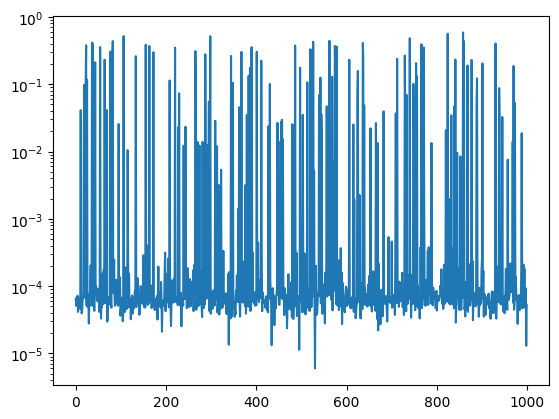

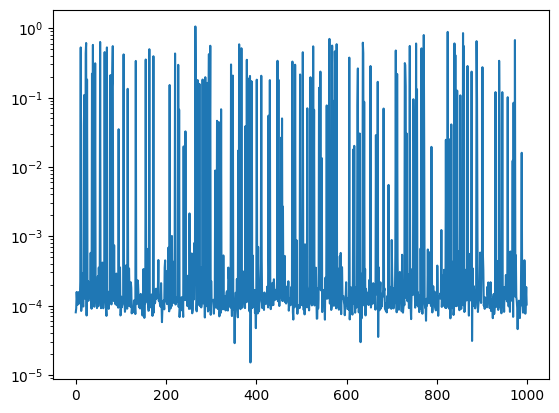

In [ ]:
plt.semilogy(err_pos)
plt.show()
plt.semilogy(err_or)
plt.show()

In [ ]:
np.array([-2.71431563e-02 ,-7.37312473e-04 , 9.99631285e-01]).T@np.array([-2.70940580e-02, -7.32252668e-04 , 9.99632620e-01])

0.9999999986086374

In [ ]:
Y = np.concatenate(Y_D3,axis=1)

for i, y in enumerate(Y.transpose()):
    print(new_edge_order[i],y)

('lbr_iiwa_joint_1', 'x') [1. 0. 0.]
('lbr_iiwa_joint_1', 'y') [ 0. -1.  0.]
('lbr_iiwa_joint_1', 'lbr_iiwa_joint_1_tilde') [0. 0. 1.]
('lbr_iiwa_joint_1', 'lbr_iiwa_joint_7') [ 0.36696345 -0.87512063  0.3154389 ]
('lbr_iiwa_joint_1', 'lbr_iiwa_joint_7_tilde') [ 0.40575706 -0.91204677 -0.05942982]
('x', 'y') [-0.70710678 -0.70710678  0.        ]
('x', 'lbr_iiwa_joint_7') [-0.44131103 -0.84418763  0.30428904]
('x', 'lbr_iiwa_joint_7_tilde') [-0.0976312  -0.99311654 -0.0647124 ]
('y', 'lbr_iiwa_joint_1_tilde') [0.         0.70710678 0.70710678]
('y', 'lbr_iiwa_joint_7') [ 0.75421374 -0.10415246  0.64831621]
('y', 'lbr_iiwa_joint_7_tilde') [ 0.69408382 -0.71268007 -0.10166003]
('lbr_iiwa_joint_1_tilde', 'x') [ 0.70710678  0.         -0.70710678]
('lbr_iiwa_joint_1_tilde', 'lbr_iiwa_joint_7') [ 0.34077788 -0.81267426 -0.47268486]
('lbr_iiwa_joint_1_tilde', 'lbr_iiwa_joint_7_tilde') [ 0.35528201 -0.7985907  -0.4858267 ]
('lbr_iiwa_joint_7', 'lbr_iiwa_joint_7_tilde') [ 0.37391531 -0.77949626